## Base Model Q3

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Import comet_ml at the top of your file, before sklearn!
from comet_ml import Experiment
import os 

# Create an experiment with your api key
comet_exp = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),  # don’t hardcode!!
    project_name="milestone_2",
    workspace="morph-e",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/morph-e/milestone-2/6856ea74c52f43c0acebda81be45df6f



In [4]:
from ift6758.features.feature_engineering1 import SeasonDataSet
from ift6758.metrics import plot_metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import numpy as np
import os
import random
import joblib


In [5]:
def seed_everything(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    
seed = 42
seed_everything(seed)

In [6]:
train_years = [2015,2016,2017]
val_years = [2018]
test_years=[2019]


In [7]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()
train_df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,10.007980
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-4.085617
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-46.636577
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-2.045408


In [8]:
val_dataset = SeasonDataSet(val_years)
val_df = val_dataset.get_tidy_data()
val_df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2018020001,Montréal Canadiens,1,00:29,REGULAR,19:31,78.0,-19.0,Backhand,0,NaN,Artturi Lehkonen,Frederik Andersen,"(89, 0)",0,21.954498,59.931417
1,Shot,2018020001,Toronto Maple Leafs,1,00:49,REGULAR,19:11,-37.0,-10.0,Snap Shot,0,NaN,Morgan Rielly,Carey Price,"(-89, 0)",0,52.952809,-10.885527
2,Shot,2018020001,Montréal Canadiens,1,01:00,REGULAR,19:00,47.0,-23.0,Wrist Shot,0,NaN,Brendan Gallagher,Frederik Andersen,"(89, 0)",0,47.885280,28.705953
3,Shot,2018020001,Montréal Canadiens,1,03:54,REGULAR,16:06,53.0,14.0,Snap Shot,0,NaN,Brendan Gallagher,Frederik Andersen,"(89, 0)",0,38.626416,-21.250506
4,Shot,2018020001,Montréal Canadiens,1,04:06,REGULAR,15:54,77.0,-2.0,Snap Shot,0,NaN,Mike Reilly,Frederik Andersen,"(89, 0)",0,12.165525,9.462322


In [9]:
# train_df["angleNet"]=np.abs(train_df["angleNet"])
# val_df["angleNet"]=np.abs(val_df["angleNet"])


In [10]:
train_df.isnull().sum() ##No nulls in our features

result.event                      0
gamePk                            0
team.name                         0
about.period                      0
about.periodTime                  0
about.periodType                  0
about.periodTimeRemaining         0
coordinates.x                     0
coordinates.y                     0
result.secondaryType             27
result.emptyNet                   0
result.strength.name         223950
shooter                           0
goalie                         1096
goalCoordinates                   0
isGoal                            0
distanceNet                       0
angleNet                          0
dtype: int64

In [11]:
train_df["result.emptyNet"].value_counts()

0    245694
1      1093
Name: result.emptyNet, dtype: int64

In [12]:
train_df["result.event"].value_counts()

Shot    223950
Goal     22837
Name: result.event, dtype: int64

In [13]:
from sklearn import preprocessing


In [14]:
def XY(df,label_column,features):
    X = df.drop([label_column],axis=1)[features]
    Y = df[label_column]
    # scaler = preprocessing.MinMaxScaler()
    # X=scaler.fit_transform(X)

    return X,Y

In [15]:
predscore_val_dict={}


In [16]:
weights_dir = "../ift6758/models/weights/"

## logreg-dis

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     77688
           1       0.00      0.00      0.00      8247

    accuracy                           0.90     85935
   macro avg       0.45      0.50      0.47     85935
weighted avg       0.82      0.90      0.86     85935



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

['../ift6758/models/weights//logreg-dis-yearvalidation.pkl']

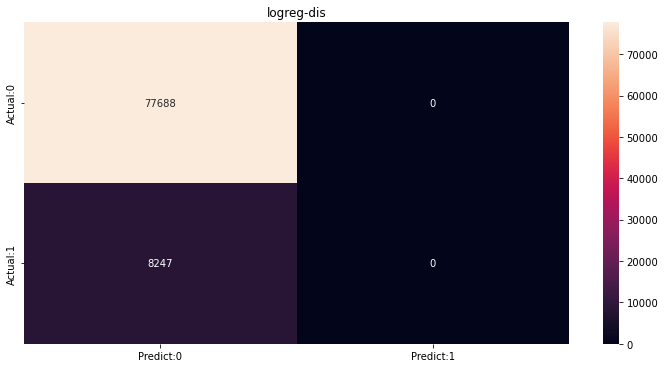

In [17]:
experiment = "logreg-dis"
features = ["distanceNet"]
label_column = "isGoal"

## Splitting X and Y
Xtrain,Ytrain = XY(train_df,label_column,features)
Xval,Yval = XY(val_df,label_column,features)

## Training
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
y_pred_val  = clf.predict(Xval)
y_pred_val_scores = clf.predict_proba(Xval)[:,1]

plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores

## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

## logreg-angle

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     77688
           1       0.00      0.00      0.00      8247

    accuracy                           0.90     85935
   macro avg       0.45      0.50      0.47     85935
weighted avg       0.82      0.90      0.86     85935



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

['../ift6758/models/weights//logreg-angle-yearvalidation.pkl']

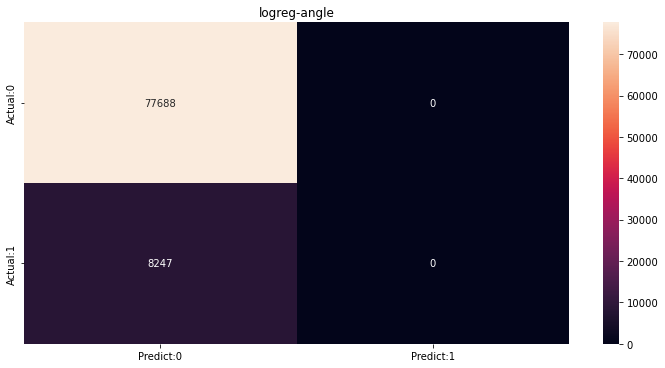

In [18]:
experiment = "logreg-angle"
features = ["angleNet"]
label_column = "isGoal"

## Splitting X and Y
Xtrain,Ytrain = XY(train_df,label_column,features)
Xval,Yval = XY(val_df,label_column,features)

## Training
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
y_pred_val  = clf.predict(Xval)
y_pred_val_scores = clf.predict_proba(Xval)[:,1]

plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores



## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

## logreg-dis-angle

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     77688
           1       0.00      0.00      0.00      8247

    accuracy                           0.90     85935
   macro avg       0.45      0.50      0.47     85935
weighted avg       0.82      0.90      0.86     85935



C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiak\.conda\envs\ift6758-conda-env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

['../ift6758/models/weights//logreg-dis-angle-yearvalidation.pkl']

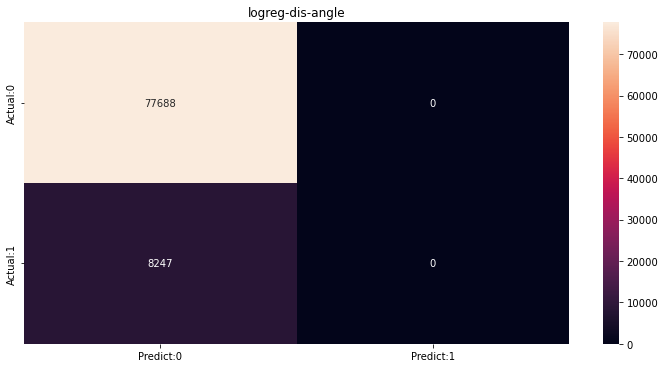

In [19]:
experiment = "logreg-dis-angle"
features = ["distanceNet","angleNet"]
label_column = "isGoal"

## Splitting X and Y
Xtrain,Ytrain = XY(train_df,label_column,features)
Xval,Yval = XY(val_df,label_column,features)

## Training
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)
y_pred_val  = clf.predict(Xval)
y_pred_val_scores = clf.predict_proba(Xval)[:,1]

plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores



## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

* It's always pedicting 0, although about 10% of data is 1
* (Need to explore) Why it's happening (Mostly because the features - diatance,angle values are similar for 1 and 0), and output of predict is 0 or 1 with probability threshold 0.5

## Dummy Classifier

              precision    recall  f1-score   support

           0       0.90      0.50      0.64     77688
           1       0.10      0.50      0.16      8247

    accuracy                           0.50     85935
   macro avg       0.50      0.50      0.40     85935
weighted avg       0.83      0.50      0.60     85935



['../ift6758/models/weights//uniform-sampling-yearvalidation.pkl']

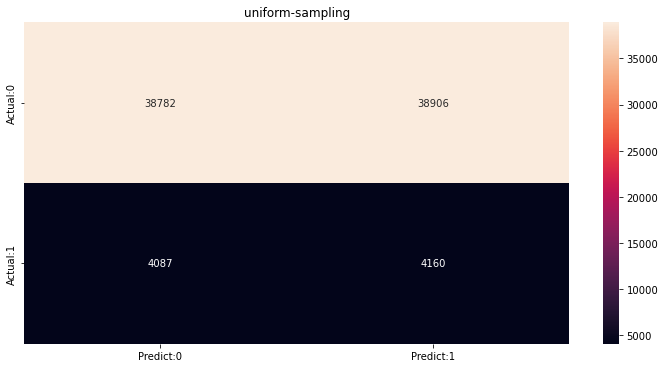

In [20]:
experiment = "uniform-sampling"
features = ["distanceNet","angleNet"]
label_column = "isGoal"

## Splitting X and Y
Xtrain,Ytrain = XY(train_df,label_column,features)
Xval,Yval = XY(val_df,label_column,features)



y_pred_val_scores = np.random.uniform(0,1,Xval.shape[0])
y_pred_val = (y_pred_val_scores>=0.5)
plot_metrics.plotConfusion(Yval,y_pred_val,title=experiment)

predscore_val_dict[experiment]={}
predscore_val_dict[experiment]['val']=Yval
predscore_val_dict[experiment]['predscore']=y_pred_val_scores



## Dumping model
filename=f"{weights_dir}/{experiment}-yearvalidation.pkl"
joblib.dump(clf,filename)

In [21]:
# Yscores[2].shape[0]/(Ytrain.shape[0]+Yscores[2].shape[0])

In [22]:
experiments = predscore_val_dict.keys()
Ytrues=[predscore_val_dict[experiment]['val'] for experiment in experiments]
Yscores=[predscore_val_dict[experiment]['predscore'] for experiment in experiments]
plot_labels=experiments


## ROC_AUC


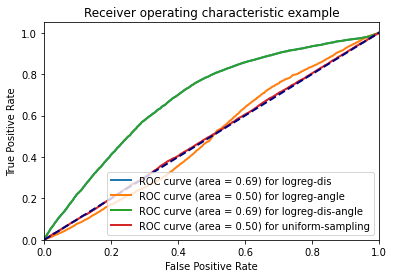

In [23]:
plot_metrics.plot_roc(Ytrues,Yscores,plot_labels)

## Model Percentile

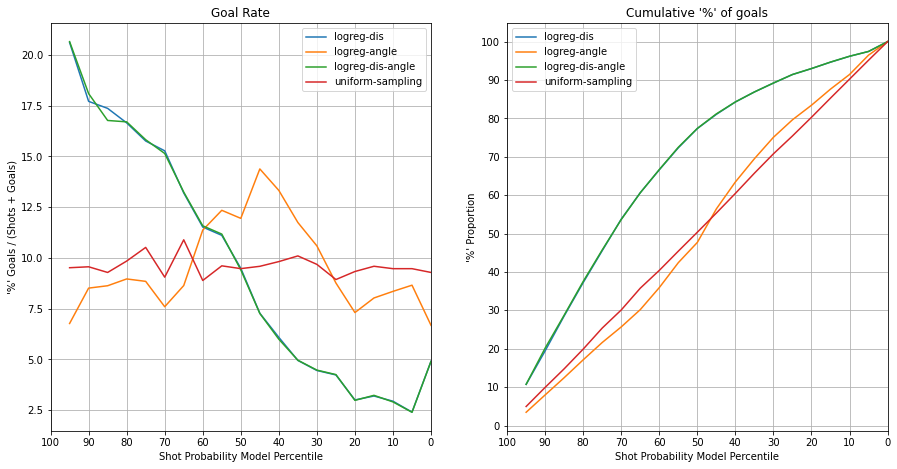

In [24]:
plot_metrics.plot_percentile(Ytrues,Yscores,bin_width=5,plot_labels=plot_labels)

## Calibrarion Curve

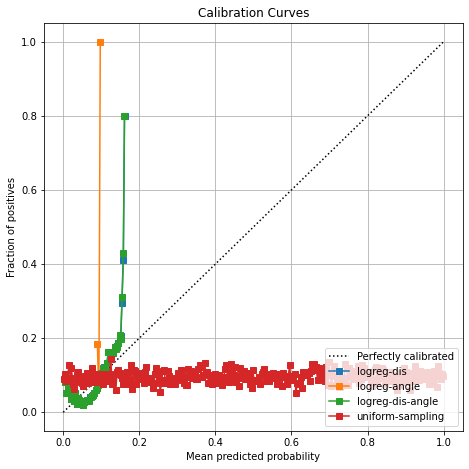

In [25]:
plot_metrics.plot_calibration(Ytrues,Yscores,plot_labels=plot_labels)

In [26]:
experiments

dict_keys(['logreg-dis', 'logreg-angle', 'logreg-dis-angle', 'uniform-sampling'])

In [27]:
comet_exp.log_model("logreg distance validation on 2018", f"{weights_dir}/logreg-dis-yearvalidation.pkl")
comet_exp.log_model("logreg angle validation on 2018", f"{weights_dir}/logreg-angle-yearvalidation.pkl")
comet_exp.log_model("logreg distance angle validation on 2018", f"{weights_dir}/logreg-dis-angle-yearvalidation.pkl")
comet_exp.log_model("logreg uniform sampling validation on 2018", f"{weights_dir}/uniform-sampling-yearvalidation.pkl")
comet_exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/morph-e/milestone-2/a356a66f43034f1ca86bf22c89a45d5f
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (306.56 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     model-element            : 4 (4.32 KB)
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...
COMET INFO: Waiting for completion of the file uploads (may take several 

In [8]:
comet_exp.end()